In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import project

from importlib import reload
reload(project)

sns.set_style('darkgrid')

warnings.filterwarnings(action='ignore')

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
df = pd.read_csv("./Drinking_Water_Potability/data/drinking_water_potability.csv")

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.shape

(3276, 10)

In [8]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Potability'].unique()

array([0, 1], dtype=int64)

0    1998
1    1278
Name: Potability, dtype: int64


Text(0, 0.5, 'Count')

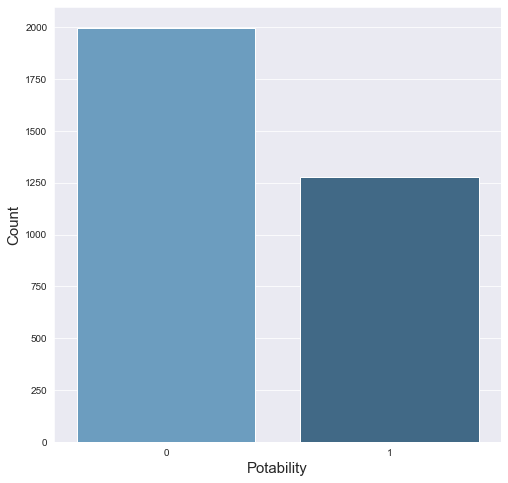

In [11]:
numb_pot = df['Potability'].value_counts()
print(numb_pot)

plt.figure(figsize=(8,8))
sns.barplot(numb_pot.index, numb_pot, palette='Blues_d')
plt.xlabel('Potability', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [12]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<AxesSubplot:>

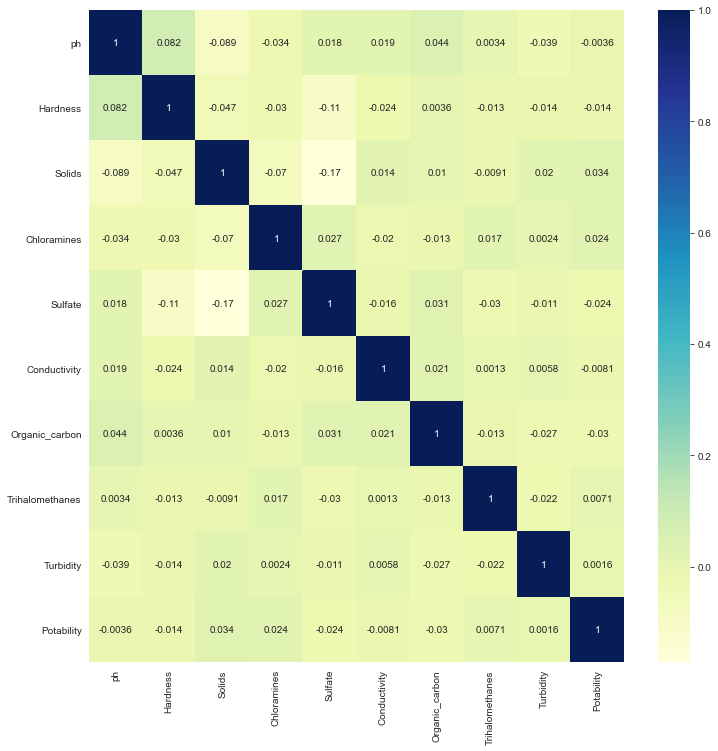

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

We drop all the raws that contains at least one NA value :

In [14]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
#df.loc[(df['Potability']==0) & (df['ph'].isna()), 'ph'] = df[df['Potability']==0]['ph'].mean(skipna=True)
#df.loc[(df['Potability']==1) & (df['ph'].isna()), 'ph'] = df[df['Potability']==1]['ph'].mean(skipna=True)

#df.loc[(df['Potability']==0) & (df['Sulfate'].isna()), 'Sulfate'] = df[df['Potability']==0]['Sulfate'].mean(skipna=True)
#df.loc[(df['Potability']==1) & (df['Sulfate'].isna()), 'Sulfate'] = df[df['Potability']==1]['Sulfate'].mean(skipna=True)

#df.loc[(df['Potability']==0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = df[df['Potability']==0]['Trihalomethanes'].mean(skipna=True)
#df.loc[(df['Potability']==1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = df[df['Potability']==1]['Trihalomethanes'].mean(skipna=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

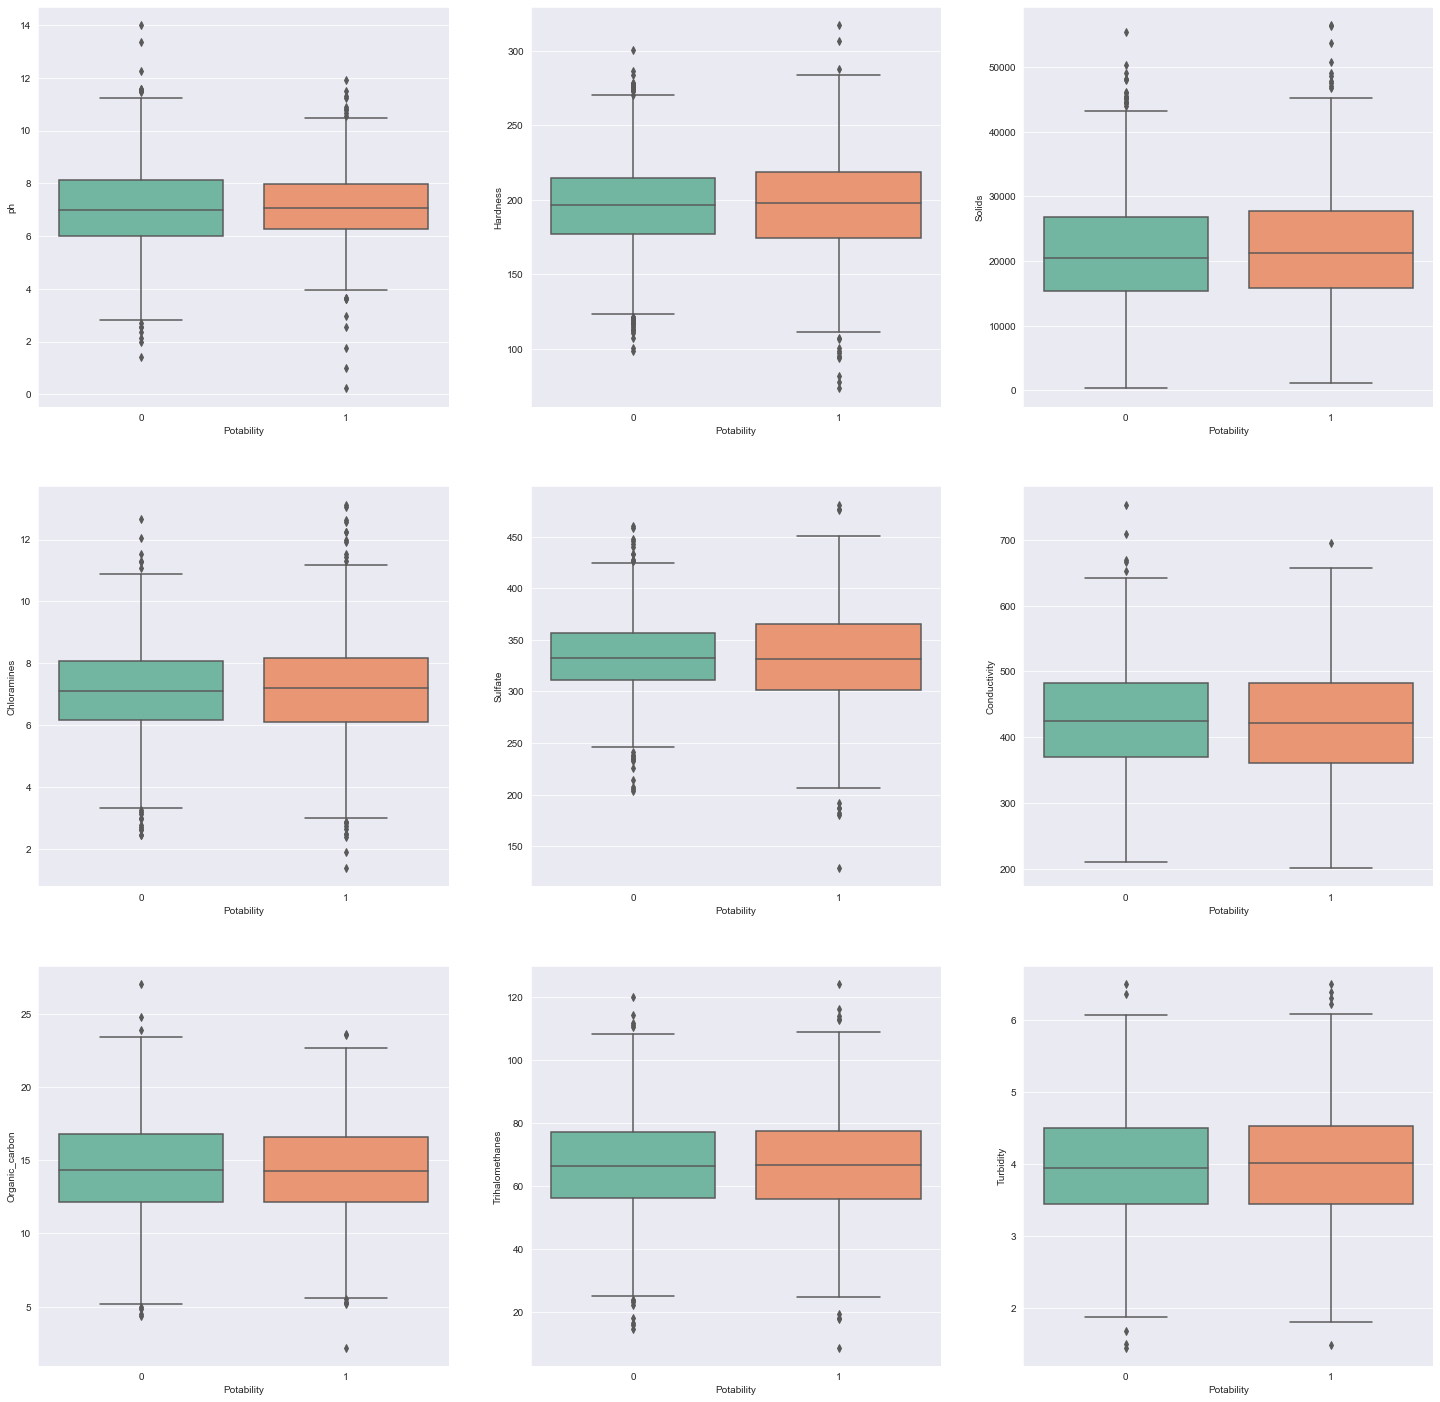

In [18]:
columns = [x for x in df.columns if x != 'Potability']
n = len(columns)

plt.figure(figsize=(25,25))
for i in range(n):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = df, x = 'Potability', y = columns[i], showfliers = True, palette = "Set2")

In [19]:
Q1, Q3 = df.quantile(.25), df.quantile(.75)
InterQ = Q3 - Q1

for k in columns :
    df.loc[df[k] >= Q3[k]+1.5*InterQ[k], k] = Q3[k] #+1.5*InterQ[k]
    df.loc[df[k] <= Q1[k]-1.5*InterQ[k], k] = Q1[k] #-1.5*InterQ[k]

#for k in columns :
#    df.drop(list(df.loc[df[k] >= Q3[k]+1.5*InterQ[k], k].index))
#    df.drop(list(df.loc[df[k] <= Q1[k]-1.5*InterQ[k], k].index))
    

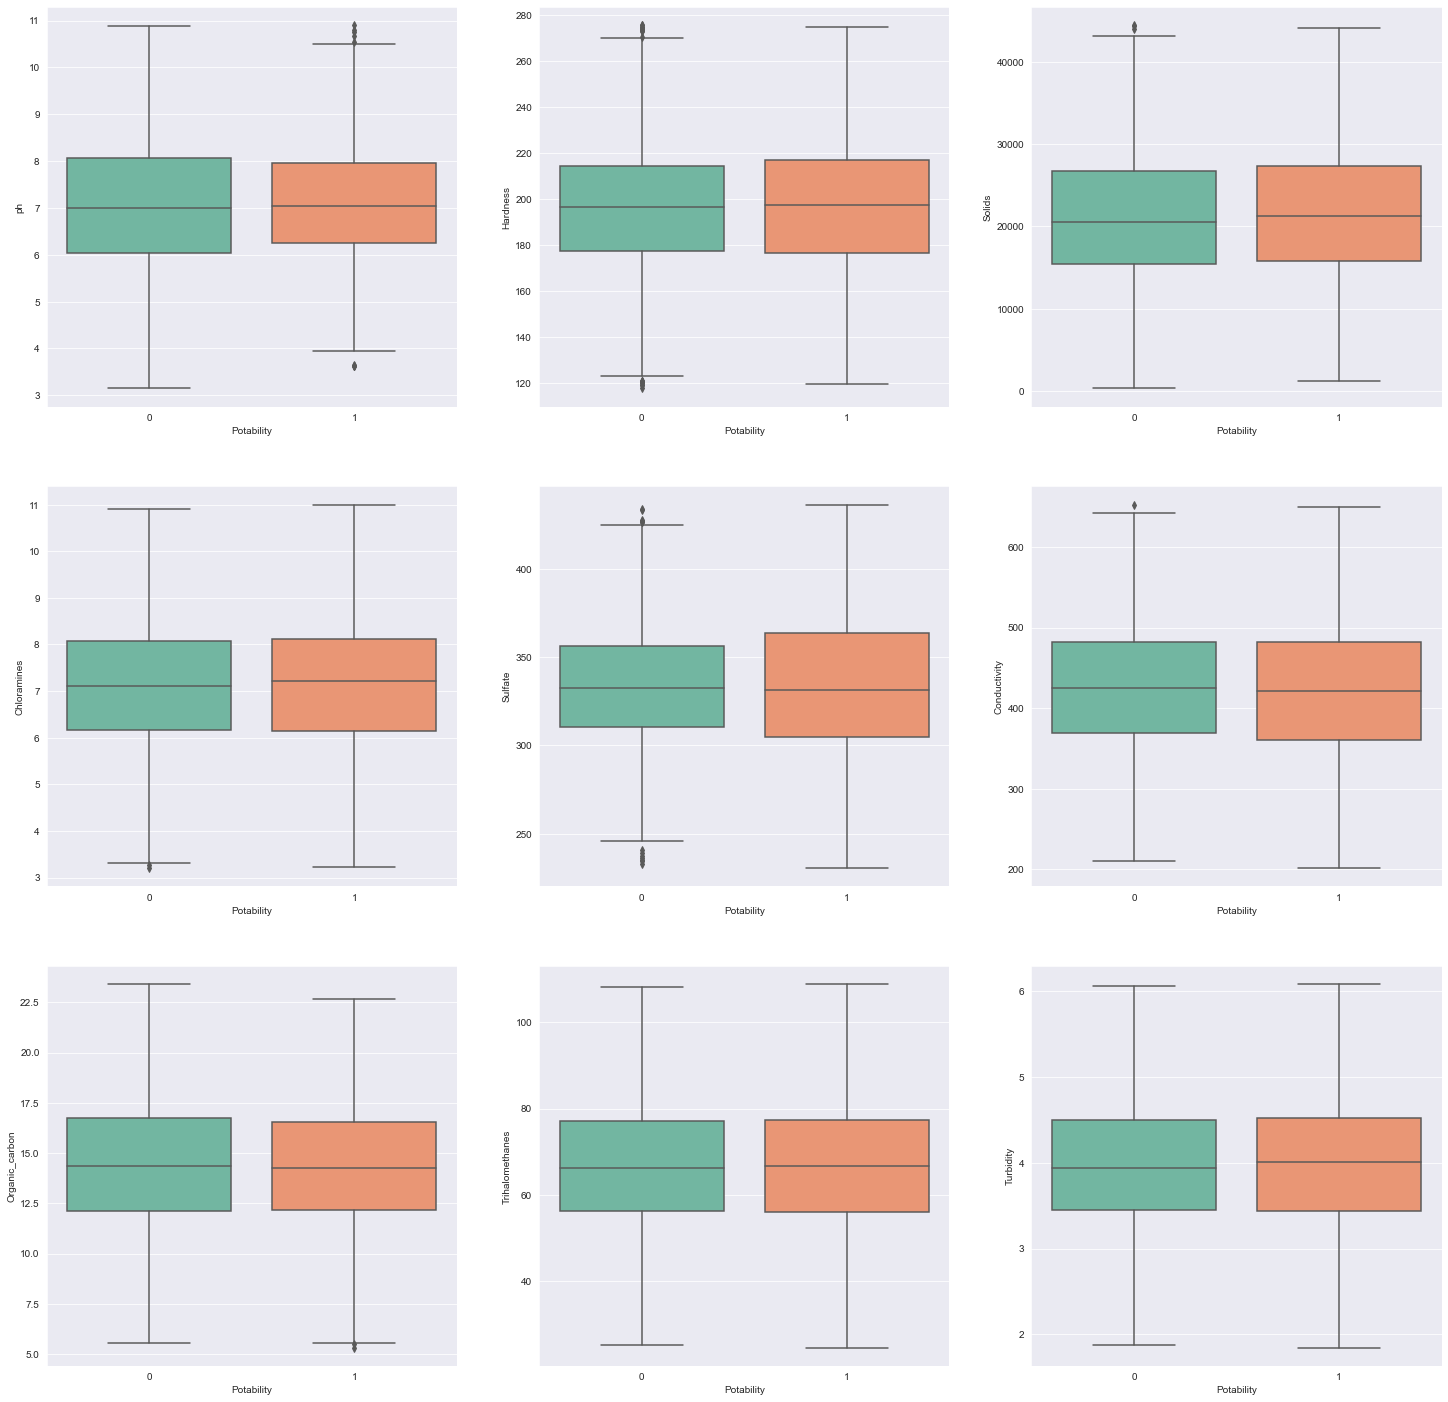

In [20]:
columns = [x for x in df.columns if x != 'Potability']
n = len(columns)

plt.figure(figsize=(25,25))
for i in range(n):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = df, x = 'Potability', y = columns[i], showfliers = True, palette = "Set2")

In [21]:
project.split_dataset(ratio=0.8, disp=False, df=df)
project.scaling_trainset()

Tue Nov  2 11:07:19 2021 : Dataset séparé
Tue Nov  2 11:07:19 2021 : Trainset mis à l'echelle


In [22]:
project.fitting_KNN_model()
project.testing_KNN_model()

project.fitting_LR_model()
project.testing_LR_model()

project.fitting_RF_model()
project.testing_RF_model()

project.fitting_SVM_model()
project.testing_SVM_model()

Tue Nov  2 11:07:19 2021 : model KNN ajusté
Tue Nov  2 11:07:19 2021 : model KNN testé
Accuracy KNN : 66.25 %

Tue Nov  2 11:07:19 2021 : model LR ajusté
Tue Nov  2 11:07:19 2021 : model LR testé
Accuracy LR : 61.29 %

Tue Nov  2 11:07:19 2021 : model RF ajusté
Tue Nov  2 11:07:19 2021 : model RF testé
Accuracy RF : 68.98 %

Tue Nov  2 11:07:19 2021 : model SVM ajusté
Tue Nov  2 11:07:19 2021 : model SVM testé
Accuracy RF : 70.22 %

